In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [2]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [3]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [4]:
df = pd.read_csv('VOF.L.csv', index_col= 'Date', parse_dates=True, usecols=[0,4])
df.head()

,Close
Date,
2017-12-28,326.00
2017-12-29,331.75
2018-01-02,342.00
2018-01-03,352.00
2018-01-04,350.00


In [5]:
df.shape

(1262, 1)

In [6]:
df.describe()

,Close
count,1262.000000
mean,387.623811
std,74.004481
min,214.000000
25%,331.000000
50%,348.250000
75%,459.375000
max,545.000000


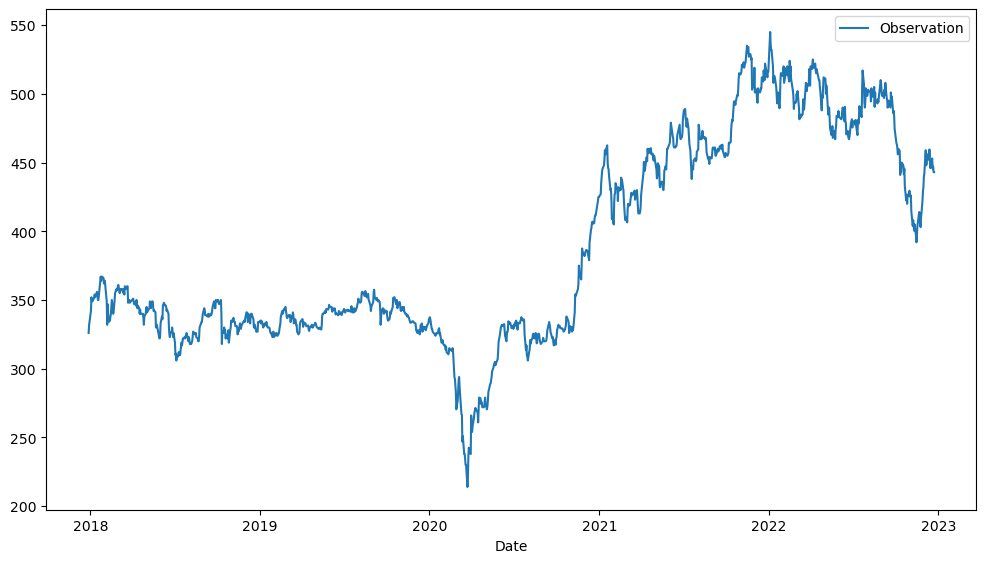

In [7]:
plt.figure(figsize=(12,6.5))
plt.plot(df['Close'], label='Observation')
plt.xlabel('Date')
plt.legend()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.8)
print(train.shape,test.shape)

(1009, 1) (253, 1)


In [9]:
train_length = len(train)
batch_size = 30

In [10]:
sc=MinMaxScaler(feature_range=(0,1))
scaled_data=sc.fit_transform(df)

In [11]:
#Tạo vòng lặp các giá trị
x_train=[]
y_train=[]
for i in range(batch_size, train_length):
    x_train.append(scaled_data[i-batch_size:i, 0])
    y_train.append(scaled_data[i, 0])

In [12]:
x_train

[array([0.33836858, 0.35574018, 0.38670695, 0.41691843, 0.41087613,
        0.40785498, 0.41389728, 0.41691843, 0.42296073, 0.41691843,
        0.41993958, 0.42900302, 0.42296073, 0.41087613, 0.41087613,
        0.41993958, 0.45015106, 0.46223565, 0.45317221, 0.46223565,
        0.46223565, 0.4592145 , 0.44712991, 0.45317221, 0.45317221,
        0.44108761, 0.40785498, 0.35649547, 0.40181269, 0.38066465]),
 array([0.35574018, 0.38670695, 0.41691843, 0.41087613, 0.40785498,
        0.41389728, 0.41691843, 0.42296073, 0.41691843, 0.41993958,
        0.42900302, 0.42296073, 0.41087613, 0.41087613, 0.41993958,
        0.45015106, 0.46223565, 0.45317221, 0.46223565, 0.46223565,
        0.4592145 , 0.44712991, 0.45317221, 0.45317221, 0.44108761,
        0.40785498, 0.35649547, 0.40181269, 0.38066465, 0.36253776]),
 array([0.38670695, 0.41691843, 0.41087613, 0.40785498, 0.41389728,
        0.41691843, 0.42296073, 0.41691843, 0.41993958, 0.42900302,
        0.42296073, 0.41087613, 0.41087613, 

In [13]:
y_train

[0.36253776435045326,
 0.3655589123867069,
 0.37462235649546827,
 0.380664652567976,
 0.39577039274924486,
 0.4108761329305137,
 0.380664652567976,
 0.3867069486404835,
 0.3987915407854985,
 0.4108761329305137,
 0.4259818731117826,
 0.43504531722054396,
 0.4320241691842901,
 0.43504531722054396,
 0.44108761329305146,
 0.4441087613293051,
 0.4259818731117826,
 0.43504531722054396,
 0.43504531722054396,
 0.43504531722054396,
 0.4320241691842901,
 0.43504531722054396,
 0.4259818731117826,
 0.42900302114803623,
 0.42296072507552873,
 0.44108761329305146,
 0.43504531722054396,
 0.43504531722054396,
 0.44108761329305146,
 0.44108761329305146,
 0.404833836858006,
 0.4108761329305137,
 0.404833836858006,
 0.40785498489425986,
 0.40785498489425986,
 0.41389728096676737,
 0.40785498489425986,
 0.40181268882175236,
 0.404833836858006,
 0.3987915407854985,
 0.4108761329305137,
 0.3987915407854985,
 0.392749244712991,
 0.3987915407854985,
 0.392749244712991,
 0.380664652567976,
 0.38972809667673713

In [14]:
#Xếp dữ liệu thánh 1 mảng
x_train=np.array(x_train)
y_train=np.array(y_train)
#Xếp lại dữ liệu thành mảng 1 chiều
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [15]:
x_train

array([[[0.33836858],
        [0.35574018],
        [0.38670695],
        ...,
        [0.35649547],
        [0.40181269],
        [0.38066465]],

       [[0.35574018],
        [0.38670695],
        [0.41691843],
        ...,
        [0.40181269],
        [0.38066465],
        [0.36253776]],

       [[0.38670695],
        [0.41691843],
        [0.41087613],
        ...,
        [0.38066465],
        [0.36253776],
        [0.36555891]],

       ...,

       [[0.9244713 ],
        [0.93353474],
        [0.92145015],
        ...,
        [0.87009063],
        [0.87613293],
        [0.87613293]],

       [[0.93353474],
        [0.92145015],
        [0.92749245],
        ...,
        [0.87613293],
        [0.87613293],
        [0.90030211]],

       [[0.92145015],
        [0.92749245],
        [0.9305136 ],
        ...,
        [0.87613293],
        [0.90030211],
        [0.89123867]]])

In [16]:
#Model
model=Sequential()
model.add(LSTM(units=128, return_sequences = True, input_shape=(batch_size,1)))
model.add(LSTM(units=64))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')

In [17]:
#Fit model
save_model="save_model LSTM.hdf5"
best_model=ModelCheckpoint(save_model, monitor='loss', verbose=2,save_best_only=True, model='auto')
model.fit(x_train, y_train, epochs=100, batch_size=batch_size, verbose=2,callbacks=[best_model])

Epoch 1/100

Epoch 1: loss improved from inf to 0.11918, saving model to save_model LSTM.hdf5
33/33 - 14s - loss: 0.1192 - 14s/epoch - 411ms/step
Epoch 2/100

Epoch 2: loss improved from 0.11918 to 0.05923, saving model to save_model LSTM.hdf5
33/33 - 2s - loss: 0.0592 - 2s/epoch - 56ms/step
Epoch 3/100

Epoch 3: loss improved from 0.05923 to 0.05666, saving model to save_model LSTM.hdf5
33/33 - 2s - loss: 0.0567 - 2s/epoch - 55ms/step
Epoch 4/100

Epoch 4: loss did not improve from 0.05666
33/33 - 2s - loss: 0.0584 - 2s/epoch - 53ms/step
Epoch 5/100

Epoch 5: loss did not improve from 0.05666
33/33 - 2s - loss: 0.0620 - 2s/epoch - 52ms/step
Epoch 6/100

Epoch 6: loss improved from 0.05666 to 0.05284, saving model to save_model LSTM.hdf5
33/33 - 2s - loss: 0.0528 - 2s/epoch - 53ms/step
Epoch 7/100

Epoch 7: loss improved from 0.05284 to 0.04916, saving model to save_model LSTM.hdf5
33/33 - 2s - loss: 0.0492 - 2s/epoch - 59ms/step
Epoch 8/100

Epoch 8: loss improved from 0.04916 to 0.04

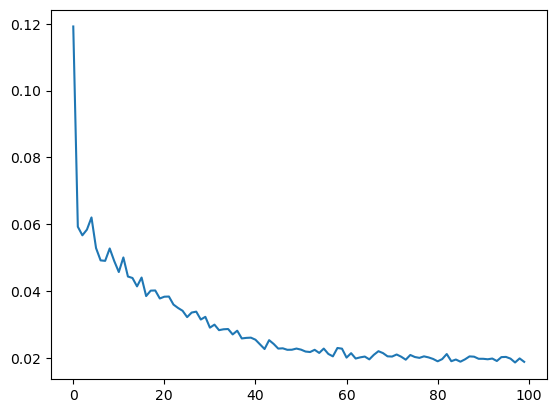

In [18]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [29]:
#Dữ liệu train
y_train=df[batch_size:train_length]
final_model=load_model("save_model LSTM.hdf5")
y_train_predict=final_model.predict(x_train)
y_train_predict=sc.inverse_transform(y_train_predict)

31/31 [==============================] - 2s 19ms/step


In [30]:
#Xử ly dữ liệu test
test=df[train_length - batch_size:].values
test=test.reshape(-1,1)
sc_test=sc.transform(test)
x_test=[]
for i in range(batch_size,test.shape[0]):
    x_test.append(sc_test[i-batch_size:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

C:\Users\Priest\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [31]:
#Dữ liêu test
y_test=df[train_length:]
y_test_predict=final_model.predict(x_test)
y_test_predict=sc.inverse_transform(y_test_predict)

8/8 [==============================] - 0s 24ms/step


C:\Users\Priest\AppData\Local\Temp\ipykernel_25052\863611272.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Train Predictions']=y_train_predict
C:\Users\Priest\AppData\Local\Temp\ipykernel_25052\863611272.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Test Predictions']=y_test_predict


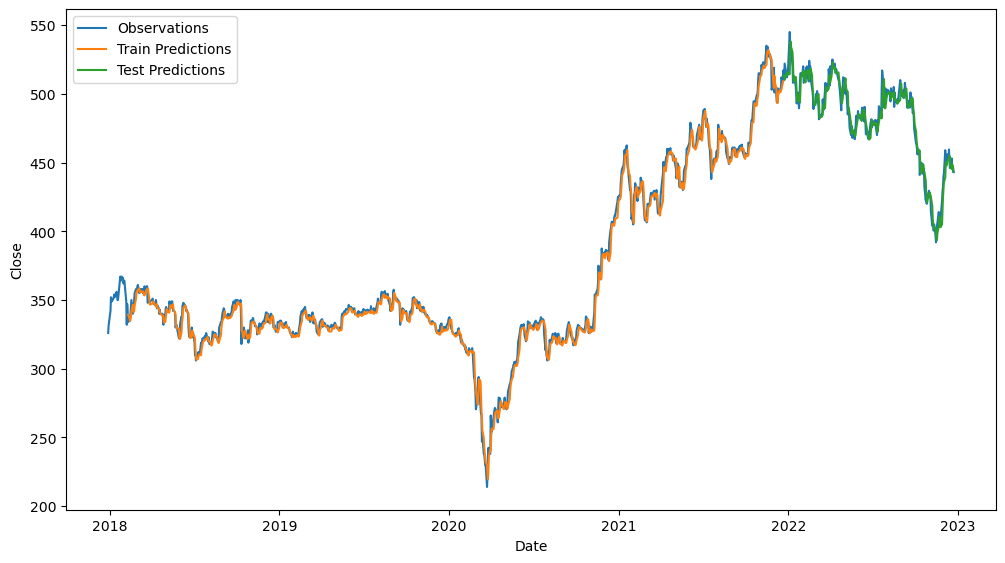

In [32]:
#Plot
train_data=df[batch_size:train_length]
test_data=df[train_length:]
plt.figure(figsize=(12,6.5))
plt.plot(df,label='Observations')
train_data['Train Predictions']=y_train_predict
plt.plot(train_data['Train Predictions'], label='Train Predictions')
test_data['Test Predictions']=y_test_predict
plt.plot(test_data['Test Predictions'],label='Test Predictions')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

In [33]:
print('Train r2 score:', r2_score(y_train,y_train_predict))
print('Train mean absolute error:', mean_absolute_error(y_train,y_train_predict))
print('Tran mean absolute percentage error:', mean_absolute_percentage_error(y_train,y_train_predict))

Train r2 score: 0.9931020314584147
Train mean absolute error: 3.6967074556905963
Tran mean absolute percentage error: 0.010328540683456757


In [34]:
print('Test r2 score:', r2_score(y_test,y_test_predict))
print('Test mean absolute error:', mean_absolute_error(y_test,y_test_predict))
print('Test mean absolute percentage error:', mean_absolute_percentage_error(y_test,y_test_predict))

Test r2 score: 0.9517796020773384
Test mean absolute error: 5.2871315696022725
Test mean absolute percentage error: 0.01099926309898187


In [35]:
import math
from sklearn.metrics import mean_squared_error
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(train_data.Close, train_data['Train Predictions']))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test_data.Close, test_data['Test Predictions']))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 5.18 RMSE
Test Score: 7.06 RMSE


<AxesSubplot:xlabel='Date'>

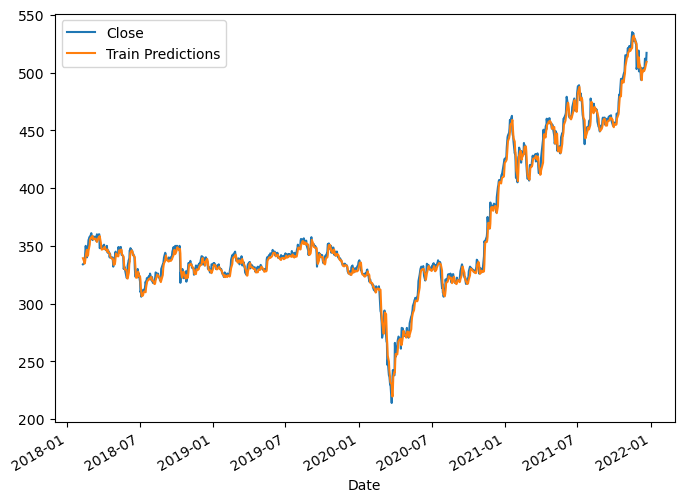

In [36]:
train_data.plot(figsize=(8,6))

<AxesSubplot:xlabel='Date'>

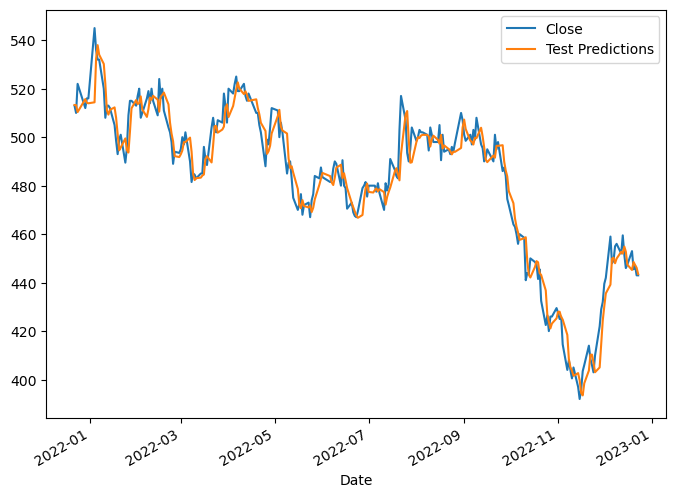

In [37]:
test_data.plot(figsize=(8,6))

In [50]:
test_data.to_csv('D:\Workspace\Python\Final\lstm20.csv')

Pred 30days

In [39]:
scaled_data.shape

(1262, 1)

In [40]:
x_input=scaled_data[:batch_size]
x_input.shape

(30, 1)

In [41]:
# now reshaping the data
x_input = x_input.reshape(1, -1)
x_input.shape

(1, 30)

In [42]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [43]:
lst_output=[]
n_steps=batch_size
i=0
while(i<30):

    if(len(temp_input)>batch_size):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = final_model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = final_model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.3785786]
1 day input [0.35574018 0.38670695 0.41691843 0.41087613 0.40785498 0.41389728
 0.41691843 0.42296073 0.41691843 0.41993958 0.42900302 0.42296073
 0.41087613 0.41087613 0.41993958 0.45015106 0.46223565 0.45317221
 0.46223565 0.46223565 0.4592145  0.44712991 0.45317221 0.45317221
 0.44108761 0.40785498 0.35649547 0.40181269 0.38066465 0.3785786 ]
1 day output [[0.378487]]
2 day input [0.38670695 0.41691843 0.41087613 0.40785498 0.41389728 0.41691843
 0.42296073 0.41691843 0.41993958 0.42900302 0.42296073 0.41087613
 0.41087613 0.41993958 0.45015106 0.46223565 0.45317221 0.46223565
 0.46223565 0.4592145  0.44712991 0.45317221 0.45317221 0.44108761
 0.40785498 0.35649547 0.40181269 0.38066465 0.3785786  0.37848699]
2 day output [[0.37738895]]
3 day input [0.41691843 0.41087613 0.40785498 0.41389728 0.41691843 0.42296073
 0.41691843 0.41993958 0.42900302 0.42296073 0.41087613 0.41087613
 0.41993958 0.45015106 0.46223565 0.45317221 0.46223565 0.46223565
 0.4592145  0.44712991 0.

In [44]:
day_new = np.arange(1,len(df)+1)
day_pred = np.arange(len(df)+1,len(df)+31)

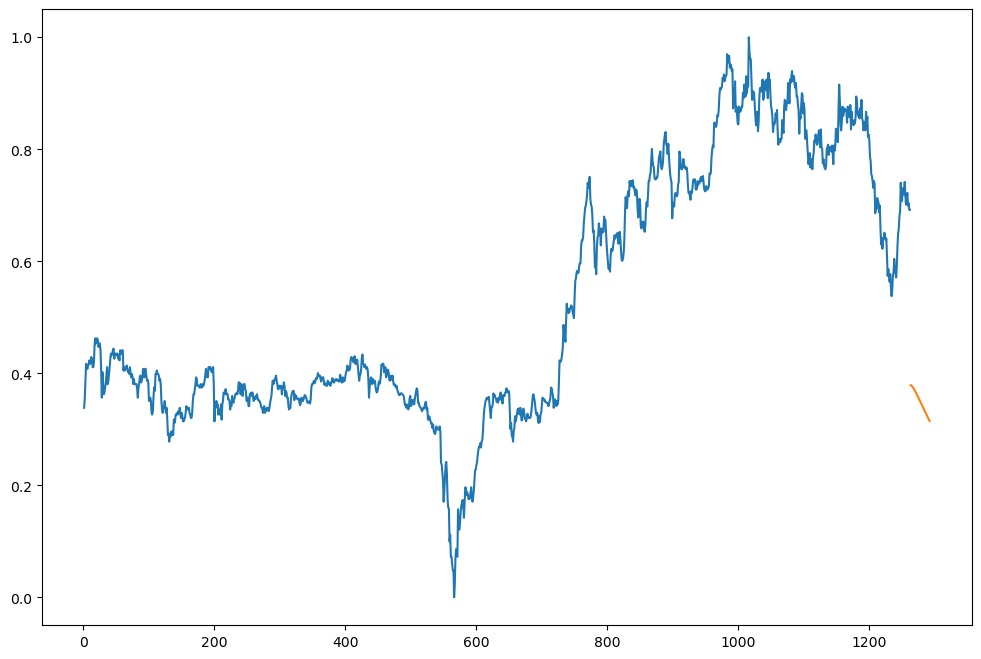

In [45]:
plt.figure(figsize=(12,8))
plt.plot(day_new,scaled_data)
plt.plot(day_pred,lst_output)

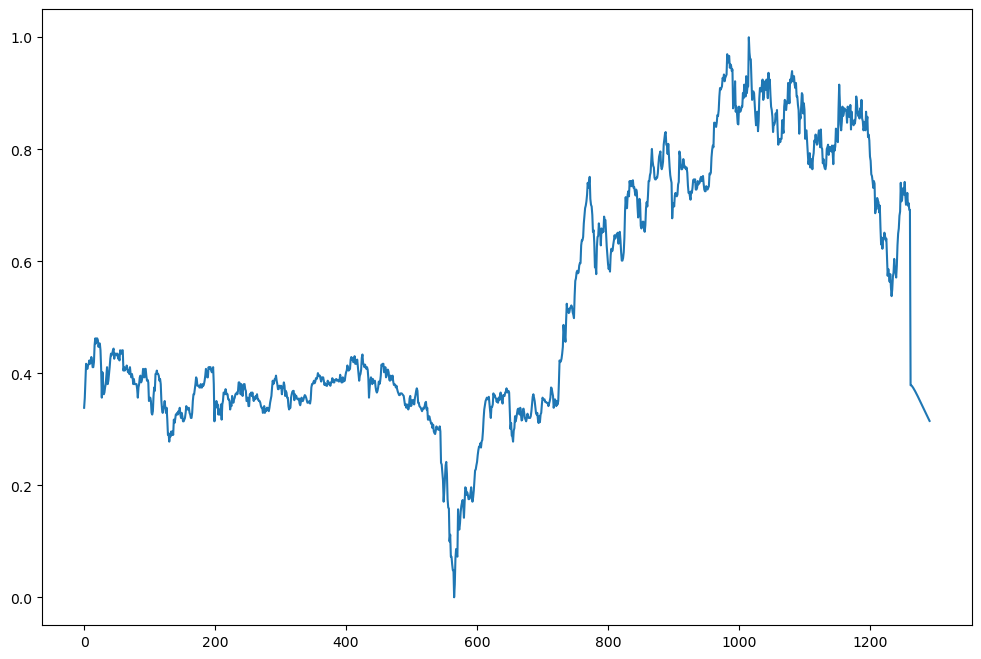

In [46]:
df3 = scaled_data.tolist()
df3.extend(lst_output)
plt.figure(figsize=(12,8))
plt.plot(df3)

In [47]:
forecast = pd.DataFrame(lst_output)
forecast=sc.inverse_transform(forecast)
forecast

array([[339.30951768],
       [339.279194  ],
       [338.91574383],
       [338.38594744],
       [337.78295594],
       [337.14267638],
       [336.47388822],
       [335.77721292],
       [335.05322263],
       [334.30437362],
       [333.53466105],
       [332.74864236],
       [331.95075658],
       [331.1448805 ],
       [330.33413133],
       [329.52087656],
       [328.70679316],
       [327.89301556],
       [327.08021456],
       [326.26880446],
       [325.45892337],
       [324.65060088],
       [323.84376794],
       [323.0383555 ],
       [322.23422545],
       [321.43130875],
       [320.6295166 ],
       [319.82882929],
       [319.02920735],
       [318.23061132]])

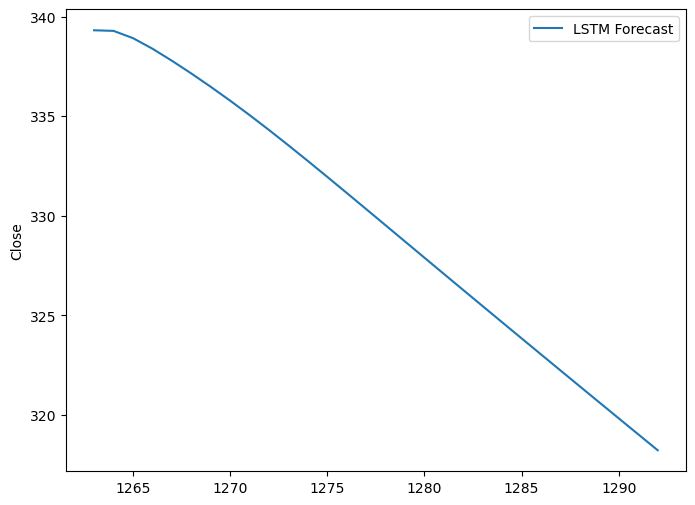

In [48]:
plt.figure(figsize=(8,6))
plt.plot(day_pred,forecast, label='LSTM Forecast')
plt.ylabel('Close')
plt.legend()
plt.show()